# ギブスサンプリング
１次元正規分布からのサンプリングのみで２次元正規分布からのサンプル取得を近似する。

In [1]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
%matplotlib inline

In [2]:
cov= np.array([[1.0, 0.6], [0.6, 1.0]])
mu = np.zeros(2)

t = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(t, t)

data = np.c_[X.ravel(), Y.ravel()]
# data = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)

Z = stats.multivariate_normal(mu, cov).pdf(data)
Z = Z.reshape(50, 50)

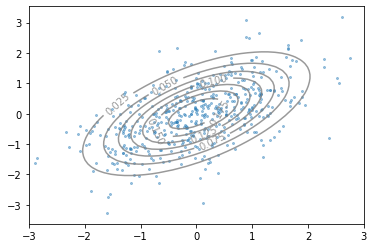

In [3]:
cont = plt.contour(X, Y, Z, colors="gray", alpha=0.8)
cont.clabel(fmt='%1.3f', fontsize=10)
rv = stats.multivariate_normal(mu, cov).rvs(500)
plt.scatter(rv[:,0], rv[:,1], s=4, alpha=0.4)

In [4]:
# return mu and sigma for the prob. dist. of a condiioned by b.
def calc_param(obs, mu_a, mu_b, var_a, var_b , cov_ab):
    mu = mu_a + cov_ab * (obs - mu_b) / var_b
    var = var_a -  cov_ab ** 2 / var_b
    return mu, np.sqrt(var)

In [6]:
random.seed(1)

# initial sample of x0
init_x0 = random.normal(scale=1.0)

# prob. dist. of x1 conditioned by x0
mu_cond, sig_cond = calc_param(init_x0, mu[1], mu[0], cov[1, 1], cov[0, 0], cov[0, 1])
# sampling x1
s = random.normal(loc=mu_cond, scale=sig_cond)

x = np.array([init_x0, s])
samples = np.array(x)

for i in range(30):
    # prob. dist. of x0 conditioned by x1
    mu_cond, sig_cond = calc_param(s, mu[0], mu[1], cov[0, 0], cov[1, 1], cov[0, 1])
    # sampling x0
    s = random.normal(loc=mu_cond, scale=sig_cond)
    x[0] = s
    samples = np.vstack([samples, x])

    # prob. dist. of x1 conditioned by x0
    mu_cond, sig_cond = calc_param(s, mu[1], mu[0], cov[1, 1], cov[0, 0], cov[0, 1])
    # sampling x1
    s = random.normal(loc=mu_cond, scale=sig_cond)
    x[1] = s
    samples = np.vstack([samples, x])

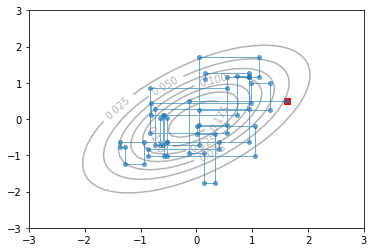

In [7]:
cont = plt.contour(X, Y, Z, colors="gray", alpha=0.6)
cont.clabel(fmt='%1.3f', fontsize=10)

plt.plot(samples[:, 0], samples[:,1], lw=1, marker="o", ms=4, alpha=0.6)
plt.scatter(samples[0,0], samples[0,1], c="r", marker="s")

### 相関が高い場合

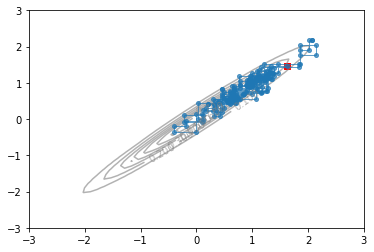

In [8]:
cov= np.array([[1.0, 0.98], [0.98, 1.0]])
mu = np.zeros(2)

t = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(t, t)

data = np.c_[X.ravel(), Y.ravel()]
# data = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)

Z = stats.multivariate_normal(mu, cov).pdf(data)
Z = Z.reshape(50, 50)


random.seed(1)

# initial sample of x0
init_x0 = random.normal(scale=1.0)

# prob. dist. of x1 conditioned by x0
mu_cond, sig_cond = calc_param(init_x0, mu[1], mu[0], cov[1, 1], cov[0, 0], cov[0, 1])
# sampling x1
s = random.normal(loc=mu_cond, scale=sig_cond)

x = np.array([init_x0, s])
samples = np.array(x)

for i in range(100):
    # prob. dist. of x0 conditioned by x1
    mu_cond, sig_cond = calc_param(s, mu[0], mu[1], cov[0, 0], cov[1, 1], cov[0, 1])
    # sampling x0
    s = random.normal(loc=mu_cond, scale=sig_cond)
    x[0] = s
    samples = np.vstack([samples, x])

    # prob. dist. of x1 conditioned by x0
    mu_cond, sig_cond = calc_param(s, mu[1], mu[0], cov[1, 1], cov[0, 0], cov[0, 1])
    # sampling x1
    s = random.normal(loc=mu_cond, scale=sig_cond)
    x[1] = s
    samples = np.vstack([samples, x])
    
    
cont = plt.contour(X, Y, Z, colors="gray", alpha=0.6)
cont.clabel(fmt='%1.3f', fontsize=10)

plt.plot(samples[:, 0], samples[:,1], lw=1, marker="o", ms=4, alpha=0.7)
plt.scatter(samples[0,0], samples[0,1], c="r", marker="s")

## 変分推論
平均場近似

# ポアソン混合モデル
ギブスサンプリング

In [148]:
n_cluster = 3
z_list = np.array([0.2, 0.5, 0.3])
mu_list = np.array([2, 9, 15])
color_list = ["r", "g", "b"]

random.seed(18)

n_sample = 1000

# 各サンプルをどの分布から発生させるか
lab = random.choice(n_cluster, n_sample, p=z_list)
class_count = Counter(lab)

data = []
for i in range(n_cluster):
    y = stats.poisson(mu_list[i]).rvs(class_count[i])
    data.append(y)

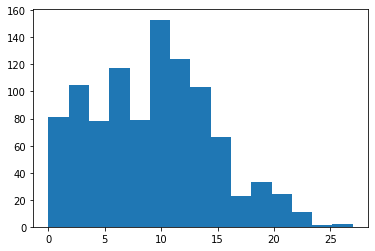

In [150]:
D = np.hstack(data)
y_max = D.max()
# bins = np.arange(-0.5, y_max + 1)
N, bins, patches = plt.hist(D, bins=15)

bin_counts = np.vstack([pd.cut(y, bins).value_counts().values for y in data]).transpose()
gamma = bin_counts / bin_counts.sum(axis=1, keepdims=True)

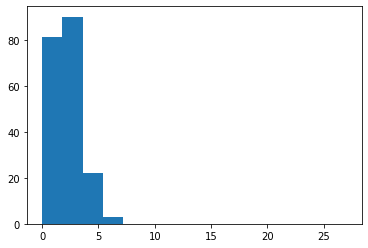

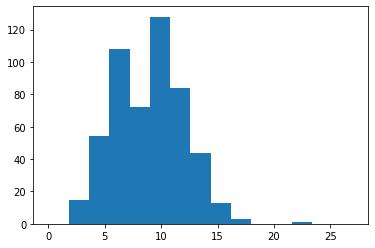

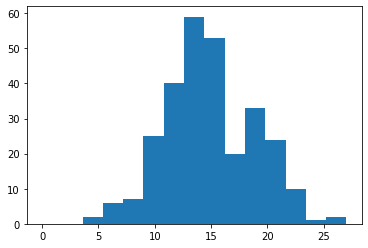

In [151]:
for y in data:
    plt.figure()
    plt.hist(y, bins)

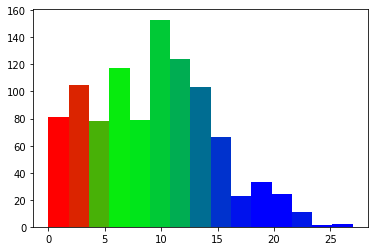

In [152]:
N, bins, patches = plt.hist(D, bins=bins)

# Now, we'll loop through our objects and set the color of each accordingly
for col, thispatch in zip(gamma, patches):
    thispatch.set_facecolor(col)

# ガウス混合モデル

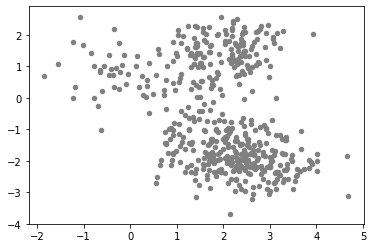

In [157]:
n_cluster = 3
z_list = np.array([0.2, 0.5, 0.3])
colors = ["r", "g", "b"]

# random.seed(1)
random.seed(18)

n_sample = 500

mu_list = stats.uniform(loc=-3, scale=6).rvs(size=(3, 2))
# mu_list = np.array([[2, 0], [0, 2], [-3, 1]])
cov_list = stats.invwishart(df=3, scale=np.eye(2)).rvs(3)
# cov_list = np.array([[[1.0, 0.7], [0.7, 1.0]],
#                     [[1.0, -0.8],[-0.8, 1.0]],
#                     [[1.0, 0.6],[0.6, 1.0]]])

# 各サンプルをどの分布から発生させるか
lab = random.choice(n_cluster, n_sample, p = z_list)
class_count = Counter(lab)

data = []
for i in range(n_cluster):
    y = stats.multivariate_normal(mean=mu_list[i], cov=cov_list[i]).rvs(class_count[i])
    data.append(y)
    
D = np.vstack(data)
plt.scatter(D[:,0], D[:,1], s=20, c="gray")

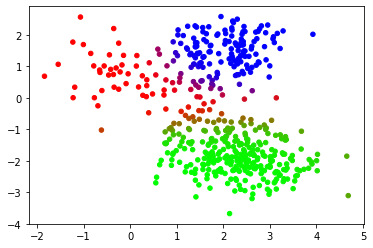

In [158]:
# 負担率
L = np.zeros((n_sample, n_cluster))
for i in range(n_cluster):
    L[:,i] = z_list[i] * stats.multivariate_normal(mean=mu_list[i], cov=cov_list[i]).pdf(D)
    
gamma = L / L.sum(axis=1)[:, np.newaxis]

# RGBで色指定
plt.scatter(D[:,0], D[:,1], s=20, c=gamma)

## ギブスサンプリング

In [160]:
# initialize mu, Delta, pi
(xmin, ymin), (xmax, ymax) = D.min(axis=0), D.max(axis=0)

random.seed(0)
mu_x = random.uniform(xmin, xmax, n_cluster)
mu_y = random.uniform(ymin, ymax, n_cluster)
mu = np.c_[mu_x, mu_y]

Delta = np.tile(0.1 * np.eye(2), (n_cluster, 1, 1))
pi = random.dirichlet(1000 * np.ones(n_cluster))

In [ ]:
# sampling s_n
eta = np.exp()
s = stats.multinomial(n=1, p=eta)

In [176]:
- (1/2) * (D[0] - mu[0]).reshape(1, -1) @ Delta[0] @ (D[0] - mu[0]) + 1/2 * np.log(np.linalg.det(Delta[0])) + np.log(pi[0])

array([-4.00999381])

## 変分推論